In [1]:
import pandas as pd
from gemelli.rpca import rpca, joint_rpca, feature_correlation_table
from biom import Table, load_table
import numpy as np
import glob
from skbio import OrdinationResults
from biom import load_table

import matplotlib.patches as mpatches
from matplotlib.pyplot import cm
from matplotlib.colors import to_hex
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import tables

In [3]:
ord_joint = OrdinationResults.read('../../results/joint-rpca/ord.txt')
ord_joint_feats = ord_joint.features.copy()
axis_use = 1 # use PC2
# import tables data 
metadata_subset = pd.read_csv('../../network/split-matched-data/metadata.tsv', sep='\t', index_col=0)
tables = {}
for table_ in glob.glob('../../network/split-matched-data/*.biom'):
    if '16S' in table_:
        continue
    if 'gene.biom' in table_:
        continue
    bt_tmp = load_table(table_)
    bt_tmp_df = pd.DataFrame(bt_tmp.matrix_data.toarray(), bt_tmp.ids('observation'), bt_tmp.ids())
    bt_tmp_df = bt_tmp_df[metadata_subset.index]
    ord_joint_feats_tmp = ord_joint_feats.loc[set(ord_joint_feats.index) & set(bt_tmp.ids('observation')), :]
    ord_joint_feats_tmp = ord_joint_feats_tmp.sort_values(by=axis_use)
    tables[table_.split('/')[-1].split('.')[0]] = [bt_tmp, bt_tmp_df, ord_joint_feats_tmp]
    
tables.keys()

soil.hip.UTK.K016.07.2017.Jan.26.day20      29.815144
soil.hip.UTK.K016.07.2017.Jan.22.day16     376.479340
soil.hip.UTK.K016.07.2017.Jan.12.day6        0.000000
soil.hip.UTK.K016.07.2017.Jan.16.day10       0.000000
soil.hip.UTK.K016.07.2017.Jan.06.day1        0.000000
                                              ...    
soil.hip.SHSU.2016.024.2016.05.03.day19      3.064841
soil.hip.SHSU.2016.024.2016.05.04.day20     19.652256
soil.hip.SHSU.2016.024.2016.05.02.day18    142.309570
soil.hip.SHSU.2016.024.2016.04.20.day6     878.650630
soil.hip.SHSU.2016.024.2016.04.21.day7     268.126280
Name: UTK.bins.58, Length: 374, dtype: float64


/var/folders/nf/69dqlgx51pxg2r40j8j1pgq40000gn/T/ipykernel_3295/2480598075.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ord_joint_feats_tmp = ord_joint_feats.loc[set(ord_joint_feats.index) & set(bt_tmp.ids('observation')), :]
/var/folders/nf/69dqlgx51pxg2r40j8j1pgq40000gn/T/ipykernel_3295/2480598075.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ord_joint_feats_tmp = ord_joint_feats.loc[set(ord_joint_feats.index) & set(bt_tmp.ids('observation')), :]
/var/folders/nf/69dqlgx51pxg2r40j8j1pgq40000gn/T/ipykernel_3295/2480598075.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ord_joint_feats_tmp = ord_joint_feats.loc[set(ord_joint_feats.index) & set(bt_tmp.ids('observation')), :]
/var/folders/nf/69dqlgx51pxg2r40j8j1pgq40000gn/T/ipykernel_3295/2480598075.py:15: FutureWar

In [4]:
# annots for tables
taxonomy_18s = pd.read_csv('../../network/annotations/18S_taxonomy.tsv', sep='\t', index_col=0)
taxonomy_18s = {k:{z.split('__')[0]:z.split('__')[-1]
               for z in x.split(';')} for k, x in zip(taxonomy_18s.index, taxonomy_18s.Taxon.values)}
taxonomy_18s = pd.DataFrame(taxonomy_18s).T
taxonomy_18s_nosp = taxonomy_18s.drop([' s'], axis=1)

taxonomy_mag = pd.read_csv('../../network/annotations/MAG_taxonomy.tsv', sep='\t', index_col=0)
taxonomy_mag = {k:{z.split('__')[0]:z.split('__')[-1]
               for z in x.split(';')} for k, x in zip(taxonomy_mag.index, taxonomy_mag.Taxon.values)}
taxonomy_mag = pd.DataFrame(taxonomy_mag).T
taxonomy_mag[taxonomy_mag == ''] = np.nan

metab_ids = pd.read_excel('../../network/metabolite_formulas.xlsx', index_col=0)
metab_ids.index = ['metab_' + str(x) for x in metab_ids.index]
metab_ids_class = metab_ids.dropna(subset=['most specific class'])


In [5]:
bt_tmp, df_tmp, ord_tmp = tables['metabolite']
keep_metab = set(metab_ids_class.index) & set(bt_tmp.ids('observation'))
bt_tmp = bt_tmp.filter(keep_metab, axis='observation')
df_tmp = df_tmp.loc[keep_metab, :]
ord_tmp = ord_tmp.loc[keep_metab, :].sort_values(by=axis_use)
tables['metabolite'] = [bt_tmp, df_tmp, ord_tmp]


/var/folders/nf/69dqlgx51pxg2r40j8j1pgq40000gn/T/ipykernel_3295/1009500775.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_tmp = df_tmp.loc[keep_metab, :]
/var/folders/nf/69dqlgx51pxg2r40j8j1pgq40000gn/T/ipykernel_3295/1009500775.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ord_tmp = ord_tmp.loc[keep_metab, :].sort_values(by=axis_use)


In [6]:
feature_feature_correlation = feature_correlation_table(ord_joint)
feature_feature_correlation.head(5)

featureid,metab_1,metab_2,metab_3,metab_4,metab_5,metab_6,metab_9,metab_10,metab_11,metab_12,...,sp|Q4Z9G3|PORTL_BPTWO_Probable_portal_protein;_XpXrXs,sp|Q52118|YMO3_PANSE_Uncharacterized_protein_in_mobD_3'region;_Xh,sp|Q5PLI4|DGCQ_SALPA_Probable_diguanylate_cyclase_DgcQ;_Xh,sp|Q5UQ90|YL532_MIMIV_Cytochrome_P450-like_protein_L532;_XhXs,sp|Q5UQG2|YL498_MIMIV_Probable_zinc-type_alcohol_dehydrogenase-like_protein_L498;_XhXs,sp|Q5UQI9|YR836_MIMIV_Uncharacterized_protein_R836;_Xu,sp|Q7VIN2|NPD_HELHP_NAD-dependent_protein_deacylase;_Xh,sp|Q8ZNY9|PRP1_SALTY_Serine/threonine-protein_phosphatase_1;_Xh,sp|Q93J06|LIP2_STRCO_Lipase_2;_Xh,sp|Q9USU3|FBH1_SCHPO_F-box_DNA_helicase_protein_1;_Xh
featureid,,,,,,,,,,,,,,,,,,,,,
metab_1,1.000000,0.950286,0.101352,0.984747,0.420760,0.122384,0.918941,-0.269318,-0.473904,-0.334884,...,-0.980094,0.140919,0.463914,-0.012220,0.311884,-0.108284,0.623929,0.321508,0.581883,-0.732900
metab_2,0.950286,1.000000,-0.175955,0.889841,0.122672,0.355225,0.842529,0.009973,-0.203890,-0.361493,...,-0.940898,-0.058314,0.216892,-0.278941,0.070982,0.066470,0.400511,0.419711,0.432676,-0.794607
metab_3,0.101352,-0.175955,1.000000,0.196816,0.742522,-0.956283,0.347035,-0.946683,-0.891130,0.518662,...,-0.064148,0.188248,0.714083,0.576518,0.384673,-0.241049,0.631158,0.113007,0.070661,0.458150
metab_4,0.984747,0.889841,0.196816,1.000000,0.560452,0.052777,0.904753,-0.350563,-0.575702,-0.383619,...,-0.949564,0.277633,0.589625,0.161888,0.464779,-0.262737,0.731480,0.191729,0.688941,-0.695063
metab_5,0.420760,0.122672,0.742522,0.560452,1.000000,-0.524905,0.424393,-0.798595,-0.863812,-0.179348,...,-0.376901,0.732394,0.851382,0.839965,0.883150,-0.652607,0.830096,-0.343410,0.713743,-0.102104


# analysis


In [7]:
# make each log-ratio based on axis
quantile_use = 0.1
features_used_all = {}
lr_cols = []
metadata_logratios = metadata_subset.copy()
for modality, (_, table_, ranks_) in tables.items():
    for i_ in range(1, 1500):
        num = ranks_.iloc[:i_, :].index
        den = ranks_.iloc[-i_:, :].index
        features_used_all[modality] = [num[:19], den[:19]]
        lr_ = np.log(table_.loc[num, :].sum(0)) - np.log(table_.loc[den, :].sum(0))
        if (sum(np.isfinite(lr_)) / table_.shape[1]) >= 0.99:
            break
    print(modality)
    print(i_)
    print(sum(np.isfinite(lr_)) / table_.shape[1])
    lr_[~np.isfinite(lr_)] = np.nan
    metadata_logratios[modality + '_logratio'] = lr_
    lr_cols.append(modality + '_logratio')
    
#metadata_logratios


/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encount

/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encount

metabolite
238
1.0
mag
30
0.9919786096256684


/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encount

/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encount

/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encount

/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encount

/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encount

/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encount

/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encount

/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encount

/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encount

/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encount

/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encount

/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encount

/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encount

/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encount

/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encount

18S
1499
0.9010695187165776
gene_module
26
1.0


/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/zacharyburcham/mambaforge/envs/qiime2-2023.7/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encount

,season,subjects,add_0c,add_0c_group,facility,climate,timepoint,traintest_0,traintest_1,traintest_2,...,traintest_4,traintest_5,traintest_6,traintest_7,traintest_8,traintest_9,metabolite_logratio,mag_logratio,18S_logratio,gene_module_logratio
sample_name,,,,,,,,,,,,,,,,,,,,,
soil.hip.UTK.K016.07.2017.Jan.26.day20,winter,K016.07,212.900000,advanced,ARF,temperate,20,train,train,train,...,train,train,train,train,train,train,0.448128,-5.182591,-3.445036,1.041402
soil.hip.UTK.K016.07.2017.Jan.22.day16,winter,K016.07,174.600000,active,ARF,temperate,16,test,test,test,...,test,test,test,test,test,test,0.178401,-3.503716,-2.077131,1.371433
soil.hip.UTK.K016.07.2017.Jan.12.day6,winter,K016.07,32.800000,early,ARF,temperate,6,train,train,train,...,train,train,train,train,train,train,0.172780,-5.176810,-2.776527,0.822410
soil.hip.UTK.K016.07.2017.Jan.16.day10,winter,K016.07,94.100000,active,ARF,temperate,10,train,train,train,...,train,train,train,train,train,train,0.777175,-7.308084,-3.627467,0.774058
soil.hip.UTK.K016.07.2017.Jan.06.day1,winter,K016.07,0.000000,initial,ARF,temperate,1,train,train,train,...,train,train,train,train,train,train,0.197061,-7.336101,-3.039735,1.327576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
soil.hip.SHSU.2016.024.2016.05.03.day19,spring,shsu.2016.024,409.166667,advanced,STAFS,temperate,19,train,train,train,...,train,train,train,train,train,train,0.542008,8.901630,NaN,1.903388
soil.hip.SHSU.2016.024.2016.05.04.day20,spring,shsu.2016.024,428.611111,advanced,STAFS,temperate,20,train,train,train,...,train,train,train,train,train,train,0.562938,7.046041,NaN,1.860410
soil.hip.SHSU.2016.024.2016.05.02.day18,spring,shsu.2016.024,391.666667,advanced,STAFS,temperate,18,train,train,train,...,train,train,train,train,train,train,0.851309,5.252962,NaN,2.168548


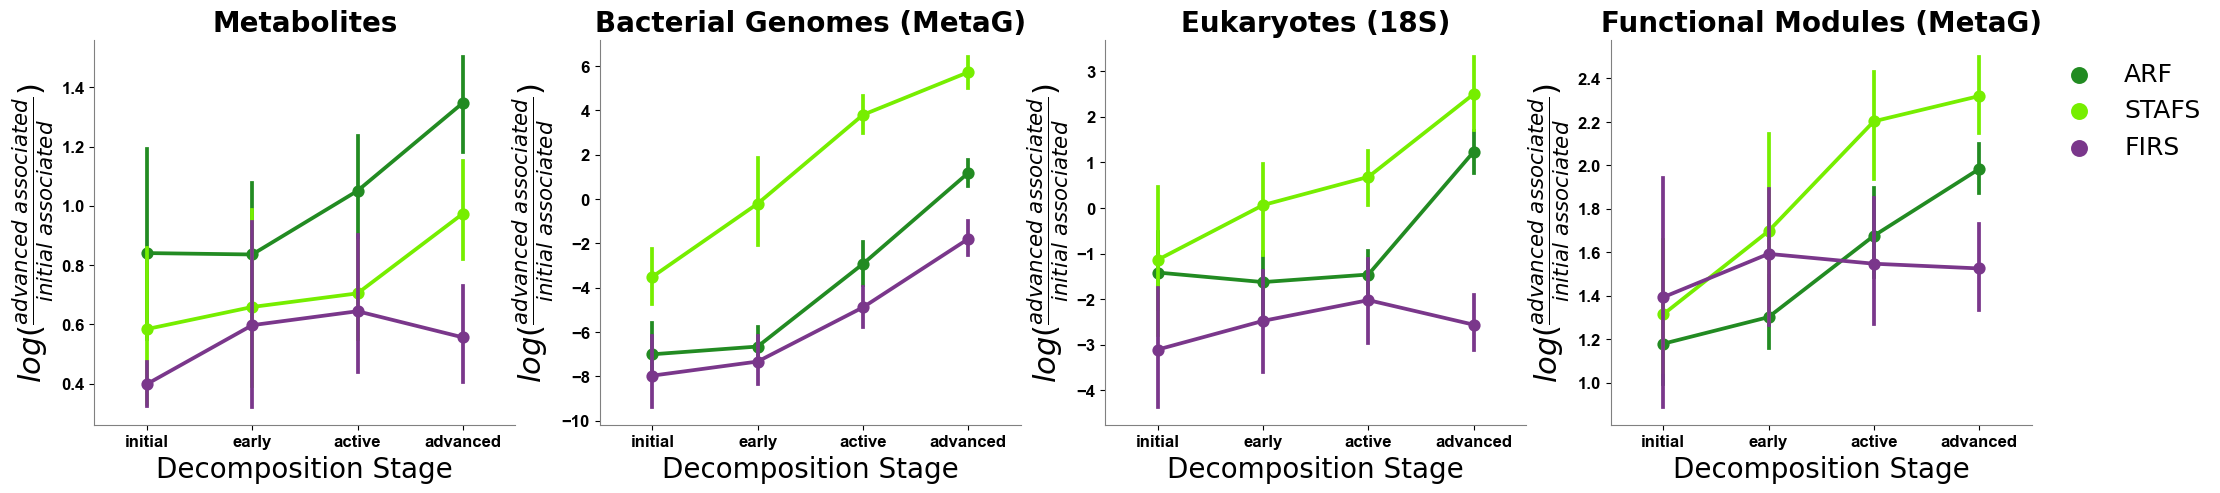

In [7]:
fig, axn = plt.subplots(1, 4, figsize=(5*5, 5))

titles_ =  {'mag_logratio':'Bacterial Genomes (MetaG)',
 '18S_logratio':'Eukaryotes (18S)',
 'gene_module_logratio':'Functional Modules (MetaG)',
 'metabolite_logratio':'Metabolites'}

palette=["#228b22","#76ee00","#7a378b"]

for ax, lr_ in zip(axn, lr_cols):


    sns.pointplot(x='add_0c_group', y=lr_, hue='facility', hue_order = ['ARF', 'STAFS', 'FIRS'], palette=palette,
                  order = ['initial', 'early', 'active', 'advanced'],
                  data=metadata_logratios, ax=ax)

    ax.set_xlabel('Decomposition Stage',
                  color='black',
                  fontsize=20)
    ax.set_ylabel('$log(\\frac{advanced\,\,associated}{initial\,\,associated})$',
                  color='black',
                  weight='bold',
                  fontsize=22)

    ax.set_title(titles_[lr_],
                  color='black',
                  weight='bold',
                  fontsize=20)

    # fix backround
    ax.set_facecolor('white')
    ax.set_axisbelow(True)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['top'].set_visible(False)
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('grey')

    for tick in ax.get_yticklabels():
        tick.set_fontproperties('arial')
        tick.set_weight('bold')
        tick.set_color("black")
        tick.set_fontsize(12)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties('arial')
        tick.set_weight('bold')
        tick.set_color("black")
        tick.set_fontsize(12)
    ax.legend_.remove()

legend = ax.legend(loc=2, 
           bbox_to_anchor=(1, 1),
           prop={'size':18},
           title="",
           fancybox=True,
                    framealpha=.0,
           ncol=1, markerscale=1.5)
legend.get_title().set_fontsize('16')
# increase the line width in the legend 
for line in legend.get_lines()[:]:
    line.set_linewidth(2.0)
for line in legend.get_lines()[:]:
    line.set_linewidth(2.0)

plt.savefig('../../results/figures/rpca-log-ratios.png',
            dpi=600, 
            bbox_inches='tight',
            edgecolor='none')
plt.show()


In [8]:
# make sure no overlap
{k_:set(v1) & set(v2) for k_, (v1, v2) in features_used_all.items()}


{'metabolite': set(), 'mag': set(), '18S': set(), 'gene_module': set()}

In [9]:
metadata_logratios.to_csv('../../results/joint-rpca/metadata_w_log_ratios.csv')

# initial associated

In [10]:
all_features = set([v_ for k_, (v1, v2) in features_used_all.items()
                    for v_ in list(v2)]) & set(feature_feature_correlation.index)
feature_feature_correlation_subset = feature_feature_correlation.loc[all_features, all_features]
feature_feature_correlation_subset.shape

/var/folders/nf/69dqlgx51pxg2r40j8j1pgq40000gn/T/ipykernel_13338/3558035153.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  feature_feature_correlation_subset = feature_feature_correlation.loc[all_features, all_features]


(76, 76)

In [11]:

new_index = []
modality_map = {}
association_map = {}

nums_all = [v_ for k, v in features_used_all.items() for v_ in v[0]]
dens_all = [v_ for k, v in features_used_all.items() for v_ in v[1]]

for ind_ in feature_feature_correlation_subset.index:
    if ind_ in taxonomy_18s_nosp.index:
        label_ = taxonomy_18s_nosp.loc[ind_, :].dropna()
        label_ = label_.values[-1] + ' (' + label_.index[-1] + ')'
        new_index.append(label_)
        modality_map[label_] = 'Eukaryotes (18S)'
        if ind_ in nums_all:
            association_map[label_] = 'day zero'
        else:
            association_map[label_] = 'advanced'
    elif ind_ in taxonomy_mag.index:
        label_ = taxonomy_mag.loc[ind_, :].dropna()
        label_ = label_.values[-1] + ' (' + label_.index[-1] + ')'
        new_index.append(label_)
        modality_map[label_] = 'Bacterial Genomes (MetaG)'
        if ind_ in nums_all:
            association_map[label_] = 'day zero'
        else:
            association_map[label_] = 'advanced'
    elif ind_ in metab_ids.index:
        new_index.append(metab_ids.loc[ind_, 'most specific class'])
        modality_map[metab_ids.loc[ind_, 'most specific class']] = 'Metabolites'
        if ind_ in nums_all:
            association_map[metab_ids.loc[ind_, 'most specific class']] = 'day zero'
        else:
            association_map[metab_ids.loc[ind_, 'most specific class']] = 'advanced'
    else:
        new_index.append(ind_)
        if ind_ in nums_all:
            association_map[ind_] = 'day zero'
        else:
            association_map[ind_] = 'advanced'
        if ind_ in tables['mag'][1].index:
            modality_map[ind_] = 'Bacterial Genomes (MetaG)'
        elif ind_ in tables['18S'][1].index:
            modality_map[ind_] = 'Eukaryotes (18S)'
        elif ind_ in tables['gene_module'][1].index:
            modality_map[ind_] = 'Functions (MetaG)'
        #elif ind_ in tables['gene'][1].index:
        #    modality_map[ind_] = 'Metagenomics (genes)'
        elif ind_ in tables['metabolite'][1].index:
            modality_map[ind_] = 'Metabolites'
              
        
# clean up
new_index = ['drop' if len(str(i_)) == 0 else i_ for i_ in new_index]
new_index = ['drop' if str(i_) == 'nan' else i_ for i_ in new_index]
#new_index = ['drop' if 'metab' in str(i_) else i_ for i_ in new_index]
new_index = [i_.replace('_',' ') for i_ in new_index]

# group
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset.copy()
feature_feature_correlation_subset_relabel['new_label'] = new_index
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.groupby('new_label').mean().T
feature_feature_correlation_subset_relabel['new_label'] = new_index
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.groupby('new_label').mean().T
feature_feature_correlation_subset_relabel.index.name = 'axis1'
feature_feature_correlation_subset_relabel.columns.name = 'axis2'
if 'drop' in feature_feature_correlation_subset_relabel.index: 
    feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.drop(['drop'], axis=1).drop(['drop'], axis=0)
feature_feature_correlation_subset_relabel.head(5)


axis2,0DH dehydrogenase ubiquinone 1 alpha subcomplex,0DH dehydrogenase ubiquinone 1 beta subcomplex,1-hydroxy-2-unsubstituted benzenoids,70-9 (f),Acetoin utilization transport system,Actinoplanes (g),Agaricomycetes ( cs),Allovahlkampfia ( g),Alteraurantiacibacter (g),Animalia ( k),...,Sphingomicrobium (g),Steroids and steroid derivatives,Subtype III-U factors,TMAO,Triacylglycerols,Tubulinea ( g),Tylenchida ( g),Uncharacterized ABC transport system,Vitamin B12 transport system,uncultured ( g)
axis1,,,,,,,,,,,,,,,,,,,,,
0DH dehydrogenase ubiquinone 1 alpha subcomplex,1.000000,0.746258,-0.506177,0.168032,0.414450,0.553866,0.704209,0.170110,0.529983,0.450469,...,0.479791,-0.177444,0.698464,0.273617,0.161758,0.301521,0.464979,0.216557,0.650087,0.475849
0DH dehydrogenase ubiquinone 1 beta subcomplex,0.746258,1.000000,-0.166068,0.344140,0.888922,0.442544,0.106564,0.757651,0.290422,0.512074,...,0.213107,-0.632868,0.290391,0.738387,-0.510242,0.348158,0.410106,0.751974,0.728670,0.222058
1-hydroxy-2-unsubstituted benzenoids,-0.506177,-0.166068,1.000000,0.622610,0.238295,-0.098734,-0.781452,0.070224,-0.424065,-0.059375,...,-0.454595,-0.649381,-0.402901,0.529530,-0.492803,-0.241243,0.442944,0.469330,-0.174405,0.263734
70-9 (f),0.168032,0.344140,0.622610,0.862395,0.453968,-0.037236,-0.231070,0.123253,-0.391092,0.580515,...,-0.457205,-0.793746,0.309191,0.646701,-0.292609,-0.036688,0.856846,0.675041,0.531192,0.355076
Acetoin utilization transport system,0.414450,0.888922,0.238295,0.453968,1.000000,0.430348,-0.342815,0.888416,0.182547,0.307186,...,0.101094,-0.842883,-0.093312,0.941869,-0.824385,0.250592,0.393567,0.914373,0.494473,0.249626


In [12]:
feature_feature_correlation_subset_relabel.to_csv('../../results/joint-rpca/intial-associated-correlation.csv')


In [13]:
feature_feature_correlation_subset_relabel

axis2,0DH dehydrogenase ubiquinone 1 alpha subcomplex,0DH dehydrogenase ubiquinone 1 beta subcomplex,1-hydroxy-2-unsubstituted benzenoids,70-9 (f),Acetoin utilization transport system,Actinoplanes (g),Agaricomycetes ( cs),Allovahlkampfia ( g),Alteraurantiacibacter (g),Animalia ( k),...,Sphingomicrobium (g),Steroids and steroid derivatives,Subtype III-U factors,TMAO,Triacylglycerols,Tubulinea ( g),Tylenchida ( g),Uncharacterized ABC transport system,Vitamin B12 transport system,uncultured ( g)
axis1,,,,,,,,,,,,,,,,,,,,,
0DH dehydrogenase ubiquinone 1 alpha subcomplex,1.000000,0.746258,-0.506177,0.168032,0.414450,0.553866,0.704209,0.170110,0.529983,0.450469,...,0.479791,-0.177444,0.698464,0.273617,0.161758,0.301521,0.464979,0.216557,0.650087,0.475849
0DH dehydrogenase ubiquinone 1 beta subcomplex,0.746258,1.000000,-0.166068,0.344140,0.888922,0.442544,0.106564,0.757651,0.290422,0.512074,...,0.213107,-0.632868,0.290391,0.738387,-0.510242,0.348158,0.410106,0.751974,0.728670,0.222058
1-hydroxy-2-unsubstituted benzenoids,-0.506177,-0.166068,1.000000,0.622610,0.238295,-0.098734,-0.781452,0.070224,-0.424065,-0.059375,...,-0.454595,-0.649381,-0.402901,0.529530,-0.492803,-0.241243,0.442944,0.469330,-0.174405,0.263734
70-9 (f),0.168032,0.344140,0.622610,0.862395,0.453968,-0.037236,-0.231070,0.123253,-0.391092,0.580515,...,-0.457205,-0.793746,0.309191,0.646701,-0.292609,-0.036688,0.856846,0.675041,0.531192,0.355076
Acetoin utilization transport system,0.414450,0.888922,0.238295,0.453968,1.000000,0.430348,-0.342815,0.888416,0.182547,0.307186,...,0.101094,-0.842883,-0.093312,0.941869,-0.824385,0.250592,0.393567,0.914373,0.494473,0.249626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tubulinea ( g),0.301521,0.348158,-0.241243,-0.036688,0.250592,0.155076,0.143312,0.264752,0.174896,0.144657,...,0.157355,-0.074947,0.117309,0.139324,-0.107216,0.159563,0.000544,0.157068,0.238702,-0.012116
Tylenchida ( g),0.464979,0.410106,0.442944,0.856846,0.393567,0.168032,0.100543,-0.047410,-0.161350,0.614343,...,-0.230511,-0.699491,0.569579,0.575790,-0.042927,0.000544,1.000000,0.543853,0.606780,0.607932
Uncharacterized ABC transport system,0.216557,0.751974,0.469330,0.675041,0.914373,0.107006,-0.480278,0.775665,-0.214945,0.515965,...,-0.297412,-0.956601,-0.021727,0.940134,-0.815778,0.157068,0.543853,1.000000,0.596742,0.105894


In [14]:

# Transform it in a links data frame (3 columns only):
links = feature_feature_correlation_subset_relabel.stack().reset_index()
links.columns = ['var1', 'var2', 'value']
 
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[(links.value.abs() > links.value.abs().quantile([0.8]).values[0]) \
                         & (links['var1'] != links['var2']) ]
# Keep self loops
#links_filtered= pd.concat([links.loc[(links.value.abs() > links.value.abs().quantile([0.9]).values[0])], 
#                          links.loc[ (links['var1'] == links['var2'])]], axis=0)


links_filtered.shape


(781, 3)

In [15]:

color_map_list = set(modality_map.values())
colors = [to_hex(c) for c in cm.Set1_r(np.linspace(0, 1, len(color_map_list)))]
color_map = {k:v for k, v in zip(color_map_list, colors)}
modality_map_label = {str(k).replace('_',' '):v for k, v in modality_map.items()}
color_map['Functions (MetaG)'] = '#50C878' # green
color_map['Metabolites'] = '#CF9FFF' # purple
color_map['Bacterial Genomes (MetaG)'] = '#FF7518' # orange 
color_map['Eukaryotes (18S)'] = '#FF0000' # red
map_shape = {'advanced':400, 'day zero':100}
assoc_map_label = {str(k).replace('_',' '):map_shape[v] for k, v in association_map.items()}



In [16]:
num_iterations = 20

for iteration in range(num_iterations):

    # Build your graph
    G = nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
    # Plot the network:
    values = range(links_filtered.shape[0])


    #pos = nx.kamada_kawai_layout(G)
    pos = nx.spring_layout(G, k=1.8)

    fig, ax = plt.subplots(1, 1, figsize=(19, 14)) 

    y_off = 3

    nx.draw(G, with_labels=True,
            pos = {k:([v[0], v[1]+y_off]) for k,v in pos.items()},
            node_color=[color_map[modality_map_label[node[0]]]
                        for node in G.nodes(data=True)], 
            node_size=[assoc_map_label[node[0]]
                        for node in G.nodes(data=True)], 
            #node_size=400,
            edge_color=[abs(feature_feature_correlation_subset_relabel.loc[u, v])
                        for u, v in G.edges],
            edge_cmap= plt.cm.Blues,
            linewidths=5,
            width=1,
            font_size=12, font_weight='bold', ax=ax)


    handles_ = [mpatches.Patch(color=c_, label=modality_) for modality_, c_ in color_map.items()]
    legend = ax.legend(handles=handles_, loc='upper center', bbox_to_anchor=(0.5, 0.05),
               prop={'size':14},
               title="",
               fancybox=True,
                        framealpha=.0,
               ncol=4, markerscale=1.5)
    legend.get_title().set_fontsize('16')
    # increase the line width in the legend 
    for line in legend.get_lines()[:]:
        line.set_linewidth(2.0)
    for line in legend.get_lines()[:]:
        line.set_linewidth(2.0)

    plt.tight_layout()

    plt.savefig(f'../../results/figures/initial-network-{iteration}.png',
                dpi=600, 
                bbox_inches='tight',
                edgecolor='none')
    
    plt.close()
    #plt.show()


# advanced associated

In [10]:
all_features = set([v_ for k_, (v1, v2) in features_used_all.items()
                    for v_ in list(v1)]) & set(feature_feature_correlation.index)
feature_feature_correlation_subset = feature_feature_correlation.loc[all_features, all_features]
feature_feature_correlation_subset.shape

/var/folders/nf/69dqlgx51pxg2r40j8j1pgq40000gn/T/ipykernel_2343/1288326497.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  feature_feature_correlation_subset = feature_feature_correlation.loc[all_features, all_features]


(76, 76)

In [11]:

new_index = []
modality_map = {}
association_map = {}

nums_all = [v_ for k, v in features_used_all.items() for v_ in v[0]]
dens_all = [v_ for k, v in features_used_all.items() for v_ in v[1]]

for ind_ in feature_feature_correlation_subset.index:
    if ind_ in taxonomy_18s_nosp.index:
        label_ = taxonomy_18s_nosp.loc[ind_, :].dropna()
        label_ = label_.values[-1] + ' (' + label_.index[-1] + ')'
        new_index.append(label_)
        modality_map[label_] = 'Eukaryotes (18S)'
        if ind_ in nums_all:
            association_map[label_] = 'day zero'
        else:
            association_map[label_] = 'advanced'
    elif ind_ in taxonomy_mag.index:
        label_ = taxonomy_mag.loc[ind_, :].dropna()
        label_ = label_.values[-1] + ' (' + label_.index[-1] + ')'
        new_index.append(label_)
        modality_map[label_] = 'Bacterial Genomes (MetaG)'
        if ind_ in nums_all:
            association_map[label_] = 'day zero'
        else:
            association_map[label_] = 'advanced'
    elif ind_ in metab_ids.index:
        new_index.append(metab_ids.loc[ind_, 'most specific class'])
        modality_map[metab_ids.loc[ind_, 'most specific class']] = 'Metabolites'
        if ind_ in nums_all:
            association_map[metab_ids.loc[ind_, 'most specific class']] = 'day zero'
        else:
            association_map[metab_ids.loc[ind_, 'most specific class']] = 'advanced'
    else:
        new_index.append(ind_)
        if ind_ in nums_all:
            association_map[ind_] = 'day zero'
        else:
            association_map[ind_] = 'advanced'
        if ind_ in tables['mag'][1].index:
            modality_map[ind_] = 'Bacterial Genomes (MetaG)'
        elif ind_ in tables['18S'][1].index:
            modality_map[ind_] = 'Eukaryotes (18S)'
        elif ind_ in tables['gene_module'][1].index:
            modality_map[ind_] = 'Functions (MetaG)'
        #elif ind_ in tables['gene'][1].index:
        #    modality_map[ind_] = 'Metagenomics (genes)'
        elif ind_ in tables['metabolomics'][1].index:
            modality_map[ind_] = 'Metabolites'
              
        
# clean up
new_index = ['drop' if len(str(i_)) == 0 else i_ for i_ in new_index]
new_index = ['drop' if str(i_) == 'nan' else i_ for i_ in new_index]
#new_index = ['drop' if 'metab' in str(i_) else i_ for i_ in new_index]
new_index = [i_.replace('_',' ') for i_ in new_index]

# group
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset.copy()
feature_feature_correlation_subset_relabel['new_label'] = new_index
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.groupby('new_label').mean().T
feature_feature_correlation_subset_relabel['new_label'] = new_index
feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.groupby('new_label').mean().T
feature_feature_correlation_subset_relabel.index.name = 'axis1'
feature_feature_correlation_subset_relabel.columns.name = 'axis2'
if 'drop' in feature_feature_correlation_subset_relabel.index: 
    feature_feature_correlation_subset_relabel = feature_feature_correlation_subset_relabel.drop(['drop'], axis=1).drop(['drop'], axis=0)
feature_feature_correlation_subset_relabel.head(5)


axis2,0DH:ubiquinone oxidoreductase mitochondria,Acinetobacter baumannii B (s),Acinetobacter rudis (s),Adhesin protein transport system,Animalia ( k),Apiotrichum ( g),Arginine/lysine/histidine/glutamine transport system,Arginine/ornithine transport system,Bacteroides E (g),Benzene and substituted derivatives,...,Tissierellales (o),Trehalose transport system,Trichosporonaceae ( fs),Type I signiture cas proteins,Tyrosine biosynthesis prephanate to pretyrosine to tyrosine,Universal Cas proteins,Vagococcus A lutrae (s),Wohlfahrtiimonadaceae (f),Wohlfahrtiimonas chitiniclastica (s),Yarrowia ( g)
axis1,,,,,,,,,,,,,,,,,,,,,
0DH:ubiquinone oxidoreductase mitochondria,1.000000,0.590542,0.779711,0.898789,0.696879,0.665600,0.829612,0.824419,0.546224,0.097297,...,0.415900,0.364552,0.560137,0.772521,0.862609,0.676430,0.608047,0.192291,0.691970,0.352590
Acinetobacter baumannii B (s),0.590542,1.000000,0.557950,0.641732,0.323941,0.007919,0.656965,0.195981,-0.187394,-0.710815,...,-0.360659,-0.187306,-0.266666,0.197918,0.415213,-0.077874,-0.005876,-0.591647,0.173133,-0.185799
Acinetobacter rudis (s),0.779711,0.557950,1.000000,0.972325,0.670988,0.362171,0.722850,0.843522,0.671667,-0.126610,...,0.548297,0.167471,0.467111,0.875800,0.959598,0.697066,0.818830,0.310460,0.904884,0.552532
Adhesin protein transport system,0.898789,0.641732,0.972325,1.000000,0.688929,0.447952,0.791462,0.850382,0.622539,-0.110949,...,0.482704,0.194851,0.472010,0.854231,0.964132,0.682922,0.755934,0.228768,0.855837,0.466544
Animalia ( k),0.696879,0.323941,0.670988,0.688929,0.826383,0.757685,0.843833,0.799299,0.554512,0.271508,...,0.494994,0.697731,0.681765,0.798094,0.702151,0.728762,0.591898,0.385219,0.608512,0.590568


In [12]:
feature_feature_correlation_subset_relabel.to_csv('../../results/joint-rpca/advanced-associated-correlation.csv')


In [13]:

# Transform it in a links data frame (3 columns only):
links = feature_feature_correlation_subset_relabel.stack().reset_index()
links.columns = ['var1', 'var2', 'value']


# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[(links.value.abs() > links.value.abs().quantile([0.8]).values[0]) \
                         & (links['var1'] != links['var2']) ]

# Keep self loops
#links_filtered= pd.concat([links.loc[(links.value.abs() > links.value.abs().quantile([0.9]).values[0])], 
#                          links.loc[ (links['var1'] == links['var2'])]], axis=0)


links_filtered.shape


(596, 3)

In [14]:
color_map_list = set(modality_map.values())
colors = [to_hex(c) for c in cm.Set1_r(np.linspace(0, 1, len(color_map_list)))]
color_map = {k:v for k, v in zip(color_map_list, colors)}
modality_map_label = {str(k).replace('_',' '):v for k, v in modality_map.items()}
color_map['Functions (MetaG)'] = '#50C878' # green
color_map['Metabolites'] = '#CF9FFF' # purple
color_map['Bacterial Genomes (MetaG)'] = '#FF7518' # orange 
color_map['Eukaryotes (18S)'] = '#FF0000' # red 
map_shape = {'advanced':400, 'day zero':100}
assoc_map_label = {str(k).replace('_',' '):map_shape[v] for k, v in association_map.items()}



In [22]:
num_iterations = 20

for iteration in range(num_iterations):

    # Build your graph
    G = nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
    # Plot the network:
    values = range(links_filtered.shape[0])


    #pos = nx.kamada_kawai_layout(G)
    pos = nx.spring_layout(G, k=1.8)

    fig, ax = plt.subplots(1, 1, figsize=(19, 14)) 

    y_off = 3

    nx.draw(G, with_labels=True,
            pos = {k:([v[0], v[1]+y_off]) for k,v in pos.items()},
            node_color=[color_map[modality_map_label[node[0]]]
                        for node in G.nodes(data=True)], 
            node_size=[assoc_map_label[node[0]]*4
                        for node in G.nodes(data=True)], 
            #node_size=400,
            edge_color=[abs(feature_feature_correlation_subset_relabel.loc[u, v])
                        for u, v in G.edges],
            edge_cmap= plt.cm.Blues,
            linewidths=5,
            width=1,
            font_size=12, font_weight='bold', ax=ax)


    handles_ = [mpatches.Patch(color=c_, label=modality_) for modality_, c_ in color_map.items()]
    legend = ax.legend(handles=handles_, loc='upper center', bbox_to_anchor=(0.5, 0.05),
               prop={'size':14},
               title="",
               fancybox=True,
                        framealpha=.0,
               ncol=4, markerscale=1.5)
    legend.get_title().set_fontsize('16')
    # increase the line width in the legend 
    for line in legend.get_lines()[:]:
        line.set_linewidth(2.0)
    for line in legend.get_lines()[:]:
        line.set_linewidth(2.0)

    plt.tight_layout()

    plt.savefig(f'../../results/figures/advanced-network-{iteration}.png',
                dpi=600, 
                bbox_inches='tight',
                edgecolor='none')
    
    plt.close()
    #plt.show()